In [1]:
import csv
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

from sklearn.model_selection import train_test_split

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestRegressor

from sklearn.feature_selection import SelectFromModel
df1=pd.read_excel('C:/Users/Asus/FindingCreditCardFraudwithRandomForestgithub/data.xlsx')

df1.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,...,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31
0,0,0,0,0,0,2,1,1,0,0,...,1,1,2,0,13,18,16,3,5,0
1,1,1,0,0,1,9,0,2,0,1,...,0,1,3,0,3,5,7,0,3,0
2,0,2,0,0,0,8,3,7,0,2,...,0,1,4,0,11,9,11,0,2,0
3,0,3,0,0,1,9,5,9,0,3,...,0,1,3,0,5,10,11,1,5,0
4,0,2,0,0,0,9,4,6,0,4,...,0,1,4,0,3,3,5,0,1,0


# Seperation of training and test datas


In [2]:
X=df1.drop(['f4'], axis='columns')
y=df1['f4']



In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


# Implementing SMOTE method

In [4]:
oversampler=SMOTE()
X_train,y_train=oversampler.fit_sample(X_train,y_train)

In [5]:
len(y_train[y_train==0])

240151

# Machine Learning Part

In [6]:
#clf=RandomForestRegressor(n_estimators=50)
clf=RandomForestClassifier(n_estimators=50)
clf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
y_pred=clf.predict(X_test)

# Accuracy and Confusion Matrix, both played a huge part on correcting the data

In [8]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9999500358076712


In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[60040     2]
 [    1     0]]


In [10]:
y_test

185775    0
72956     0
76078     0
22900     0
144836    0
         ..
101411    0
54672     0
244955    0
246056    0
287650    0
Name: f4, Length: 60043, dtype: int64

In [11]:
arr=[]
for i in y_pred:
  
        arr.append(i)
print(len(arr))


indices = [i for i, x in enumerate(arr) if x!=0 ]
print(indices)
X_test.iloc[indices , : ]


60043
[18357, 27501]


,f1,f2,f3,f5,f6,f7,f8,f9,f10,f11,...,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31
193042,0,3,3,1880,9,0,1,0,4591,110,...,0,1,6,1,17,6,13,2,1,1
187969,0,3,3,1250,9,0,3,0,4591,110,...,0,1,6,1,16,7,16,1,4,1


In [12]:
counter=0
for i in arr:
    if i:
        print(i)
        counter+=1

print(counter)

1000000
1000000
2


In [13]:
feature_imp = pd.Series(clf.feature_importances_, X.columns)
feature_imp = pd.DataFrame(feature_imp)
feature_imp = feature_imp.sort_values(feature_imp.columns[0],ascending=False)
feature_imp = feature_imp.loc[:,0]
feature_imp


f5     0.120483
f1     0.114512
f21    0.113399
f27    0.113057
f17    0.057180
f12    0.053329
f22    0.044753
f24    0.044525
f13    0.039509
f30    0.037854
f7     0.033997
f2     0.033117
f28    0.029803
f10    0.027799
f8     0.021819
f6     0.017826
f26    0.017336
f14    0.012873
f3     0.009233
f11    0.007870
f20    0.007830
f9     0.007519
f15    0.006043
f23    0.005932
f31    0.005822
f18    0.004327
f25    0.004096
f16    0.003176
f29    0.002768
f19    0.002215
Name: 0, dtype: float64

No handles with labels found to put in legend.


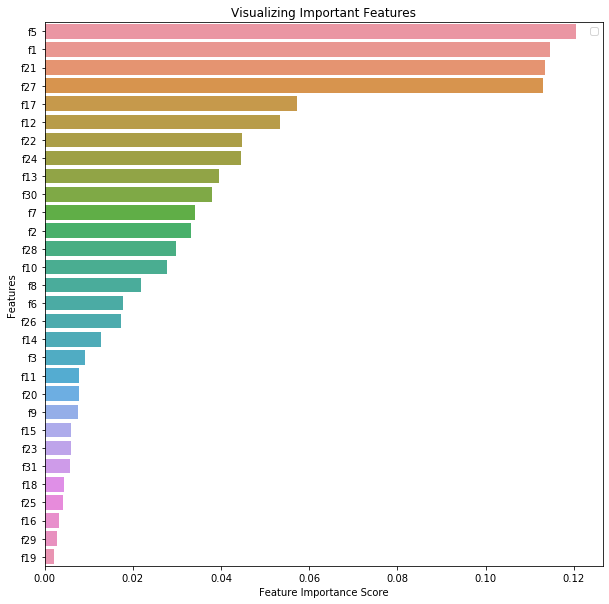

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,10)
sns.barplot(x=feature_imp, y=feature_imp.index)


plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [15]:
y_pred


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [16]:
X_test

,f1,f2,f3,f5,f6,f7,f8,f9,f10,f11,...,f22,f23,f24,f25,f26,f27,f28,f29,f30,f31
185775,1,0,0,0,0,3,3,0,213,0,...,1,1,1,0,3,16,11,0,7,0
72956,1,7,0,297,7,2,3,0,235,0,...,0,2,4,0,11,10,11,0,2,0
76078,1,11,0,0,9,0,5,0,12,0,...,0,1,2,0,18,11,9,0,3,1
22900,1,0,0,0,5,4,4,0,139,0,...,0,1,3,0,8,7,8,0,1,0
144836,1,10,0,0,9,0,3,0,50,0,...,0,1,1,0,13,8,5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101411,1,11,0,180,1,1,5,0,139,0,...,1,1,2,0,15,16,13,1,4,0
54672,0,0,0,14,6,1,3,0,150,0,...,1,1,3,0,4,6,5,0,2,0
244955,1,7,0,285,6,3,5,0,234,0,...,1,1,1,0,15,18,17,3,6,0
246056,1,4,0,0,0,0,0,0,139,0,...,1,1,1,0,19,19,18,1,7,0
